# QPEmbedding

In [16]:
import pennylane as qml
from pennylane import numpy as np
# Importing standard Qiskit libraries
from qiskit.visualization import *
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-03 00:39:21,455: Credentials are already in use. The existing account in the session will be replaced.


### Example 1:

In [12]:
import pennylane as qml
from pennylane import numpy as np

# Define the DNA sequence
dna_sequence = "AGCGG"

# Define the AngleEmbedding circuit
def AngleEmbedding(dna_sequence):
    # Define the mapping of nucleotides to qubit positions
    nucleotide_map = {"A": 0, "C": 1, "G": 2, "T": 3}

    # Initialize the circuit
    num_qubits = len(dna_sequence)
    dev = qml.device("default.qubit", wires=num_qubits)
    @qml.qnode(dev)
    def circuit():
        # Encode each nucleotide as a rotation angle
        for i in range(num_qubits):
            qml.RY(np.pi * nucleotide_map[dna_sequence[i]], wires=i)
        
        # Apply the CNOT layer
        for i in range(num_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        
        # Measure the state
        return qml.state()

    # Evaluate the circuit and return the statevector
    return circuit()

# Encode the DNA sequence and print the resulting statevector
statevector = AngleEmbedding(dna_sequence)
print(statevector)


[-6.12323400e-17+0.j  7.49879891e-33+0.j -9.18338009e-49+0.j
  7.49879891e-33+0.j  1.22464680e-16+0.j -1.49975978e-32+0.j
  1.22464680e-16+0.j -1.00000000e+00+0.j  1.22464680e-16+0.j
 -1.49975978e-32+0.j  1.83667602e-48+0.j -1.49975978e-32+0.j
 -9.18338009e-49+0.j  1.12463970e-64+0.j -9.18338009e-49+0.j
  7.49879891e-33+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j]


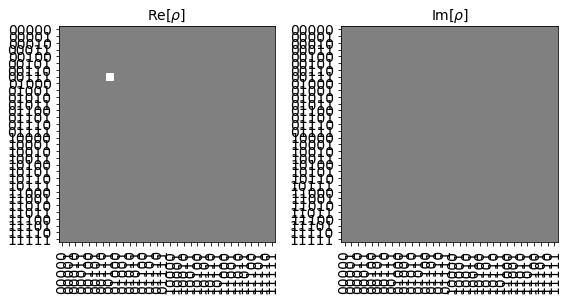

In [13]:
plot_state_hinton(statevector)

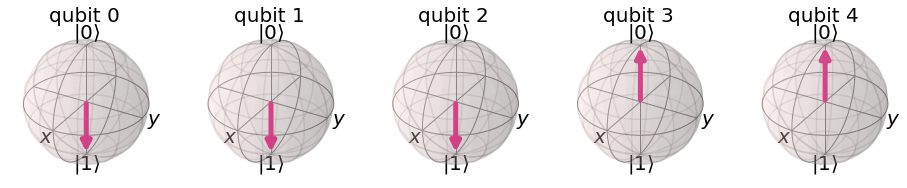

In [14]:
plot_bloch_multivector(statevector)

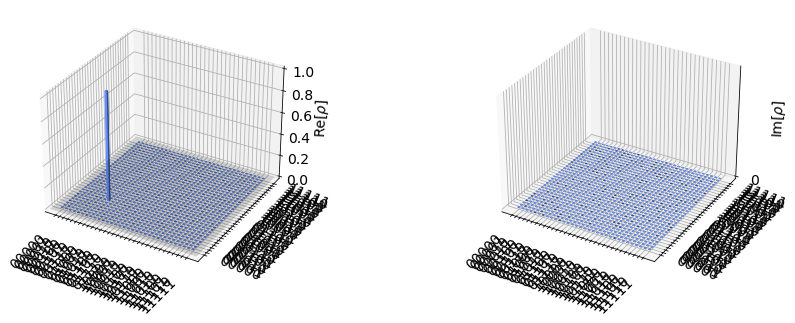

In [15]:
plot_state_city(statevector)